# Forman Ricci Curvature - Example

In [6]:
!pip install GeneralisedFormanRicci gudhi plotly networkx numpy

# Import Python Libraries
import numpy as np
import networkx as nx 
import plotly.graph_objects as go
from GeneralisedFormanRicci.frc import GeneralisedFormanRicci, gen_graph, n_faces

In [2]:
import matplotlib.cm
import matplotlib as mpl

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

seismic_cmap = matplotlib.cm.get_cmap('seismic')

seismic_rgb = []
norm = mpl.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
    k = mpl.colors.colorConverter.to_rgb(seismic_cmap(norm(i)))
    seismic_rgb.append(k)

seismic = matplotlib_to_plotly(seismic_cmap, 255)

In [3]:
# Using a simple point-cloud data, we can generate simplicial complexes based on some cutoff distances.
data = [[0.8, 2.6], [0.2, 1.0], [0.9, 0.5], [2.7, 1.8], [1.7, 0.5], [2.5, 2.5], [2.4, 1.0], [0.6, 0.9], [0.4, 2.5], [1, 1.5]]

In [4]:
# For e.g. Generating Rips complex with filtration parameters f = 0, 0.5, 1, 1.2, 1.5, 2

## 0-Simplex Forman Ricci Curvature

Rips Complex Constructed.


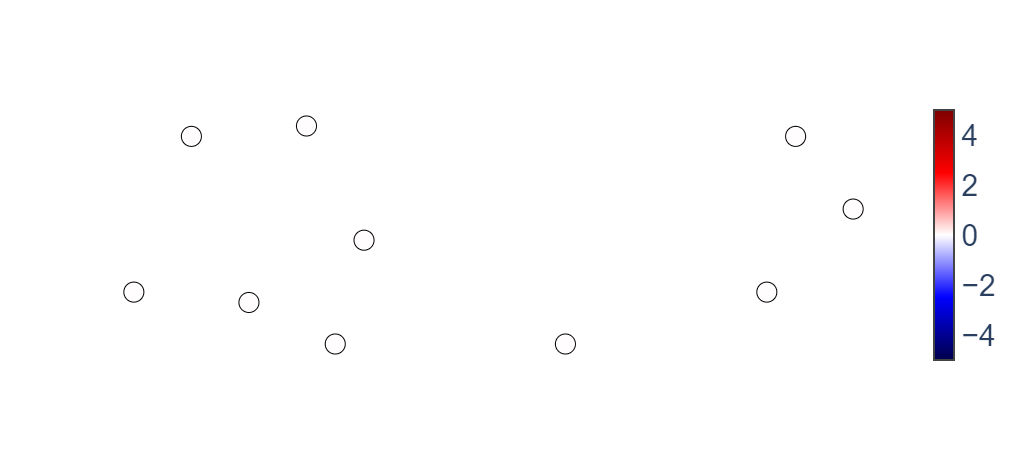

Rips Complex Constructed.


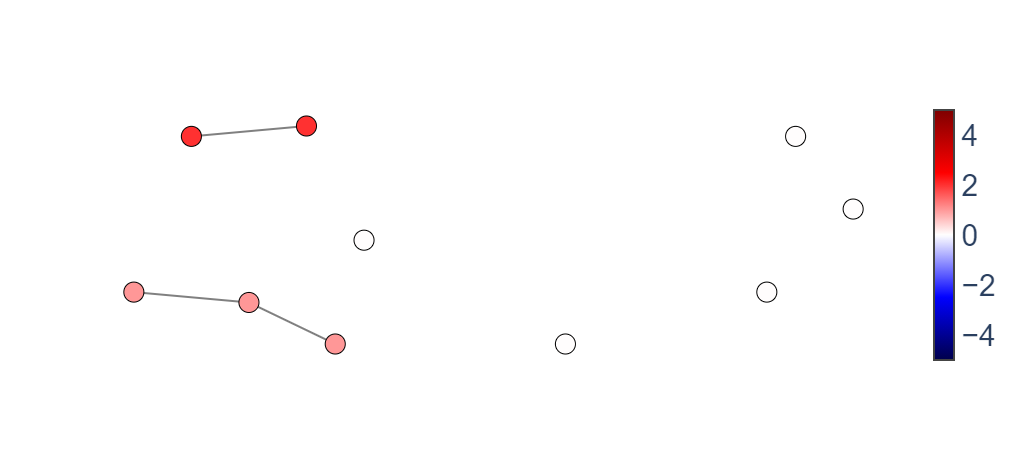

Rips Complex Constructed.


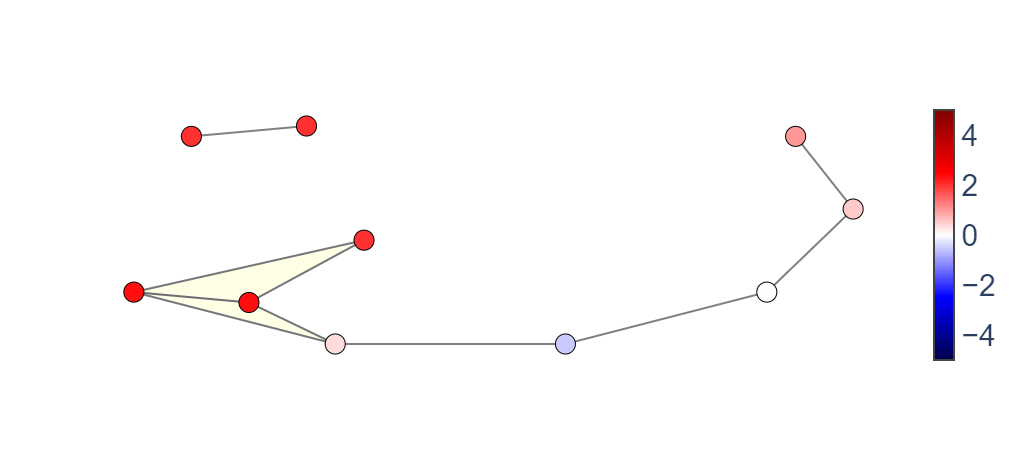

Rips Complex Constructed.


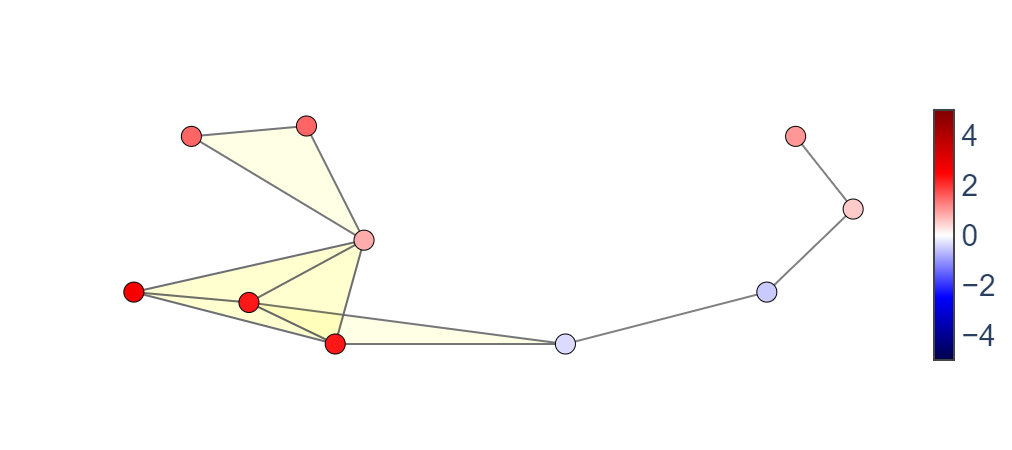

Rips Complex Constructed.


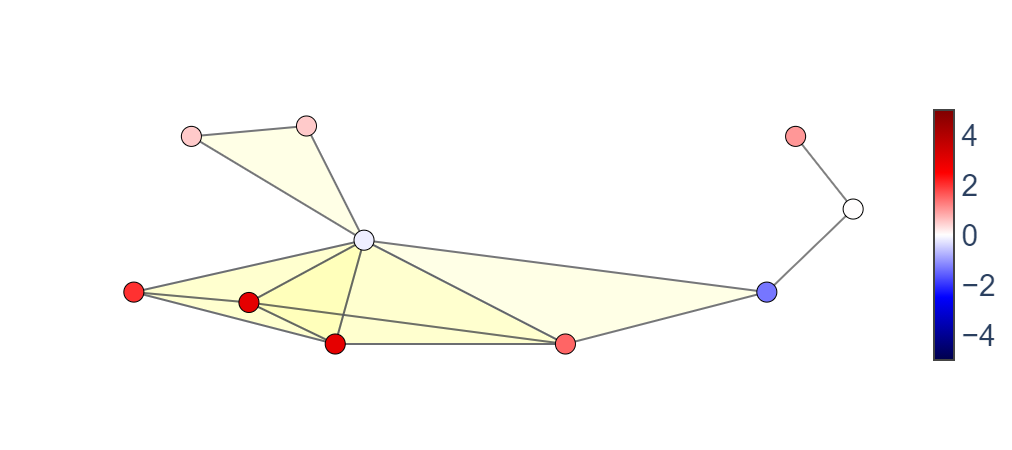

Rips Complex Constructed.


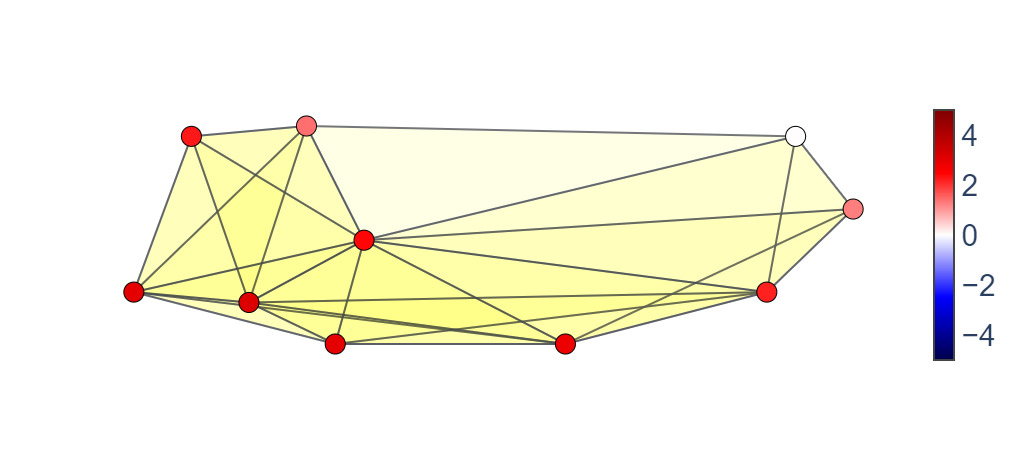

In [5]:
for f in [0, 0.5, 1, 1.2, 1.5, 2]:
    sc = GeneralisedFormanRicci(data, epsilon = f)
    G = gen_graph(list(n_faces(sc.S, 1)), sc.pts, sc.labels)
    node_dict = sc.compute_forman()[0]
    node_frc = list(node_dict.values())

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['coords']
        x1, y1 = G.nodes[edge[1]]['coords']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)


    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color='black'),
        hoverinfo='none', opacity=0.5,
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['coords']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            colorscale=seismic, color = node_frc, cmin=-5, cmax=5,
            size=20, opacity=1, line=dict(color='black', width=1), colorbar=dict(thickness=20, outlinewidth=2, tickfont=dict(family='Arial', size=30))
            ),
            line_width=2)

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    tri = dict()
    vertices = list(G.nodes())

    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            for k in range(j+1, len(vertices)):
                dist1 = np.linalg.norm(np.array(G.nodes[vertices[i]]['coords']) - G.nodes[vertices[j]]['coords'])
                dist2 = np.linalg.norm(np.array(G.nodes[vertices[j]]['coords']) - G.nodes[vertices[k]]['coords'])
                dist3 = np.linalg.norm(np.array(G.nodes[vertices[k]]['coords']) - G.nodes[vertices[i]]['coords'])
                if dist1 <= f and dist2 <= f and dist3 <= f:
                    #print(v,w,x)
                    tri[(i,j,k)] = dict(type="path", path=" M "+str(G.nodes[vertices[i]]['coords'][0])+" "+str(G.nodes[vertices[i]]['coords'][1])+" L "+str(G.nodes[vertices[j]]['coords'][0])+" "+str(G.nodes[vertices[j]]['coords'][1])+" L "+ str(G.nodes[vertices[k]]['coords'][0])+" "+str(G.nodes[vertices[k]]['coords'][1])+" Z", fillcolor="yellow", opacity=.1, layer='below')


    shapes = list(tri.values())
    fig.update_layout(shapes = shapes, scene = dict(
        xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        showbackground=False,
        title='',
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        showbackground=False,
        ticks='',
        title='',
        showticklabels=False
    ),
    zaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        showbackground=False,
        title='',
        ticks='',
        showticklabels=False
    )))
    fig.show()

## 1-Simplex Forman Ricci Curvature

Rips Complex Constructed.


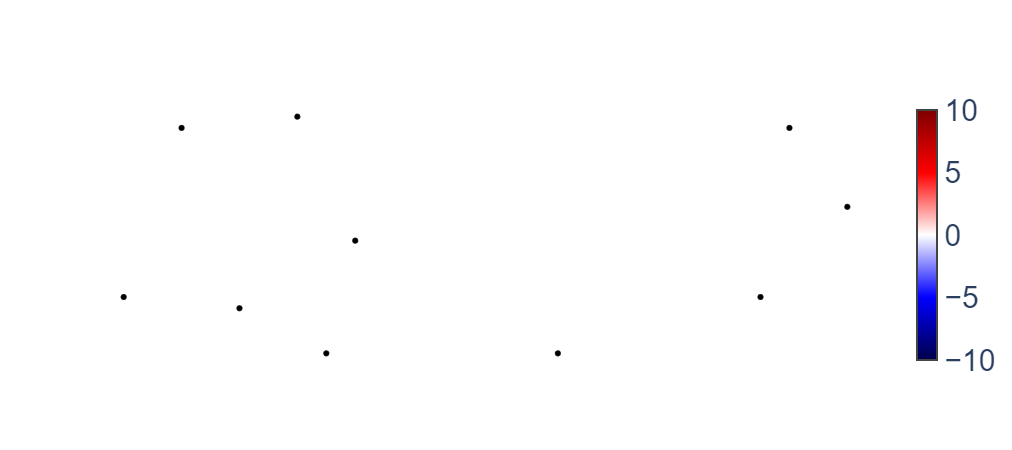

Rips Complex Constructed.


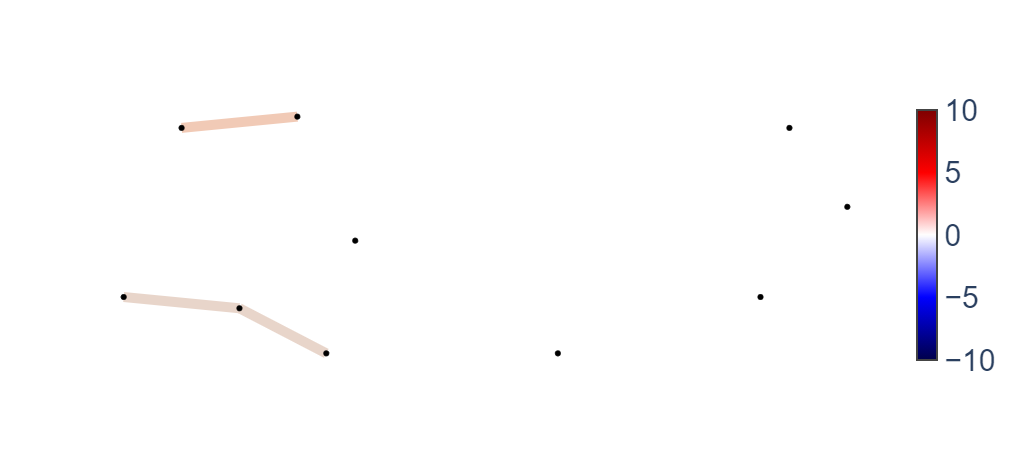

Rips Complex Constructed.


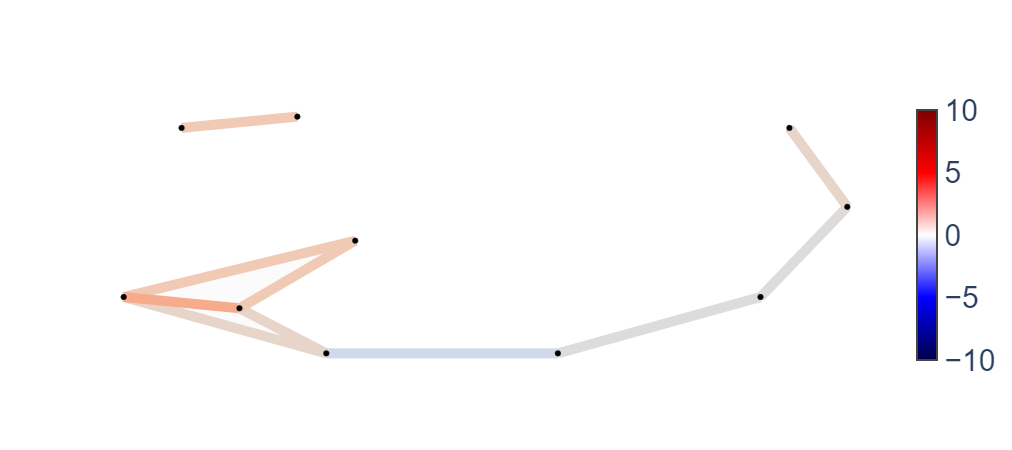

Rips Complex Constructed.


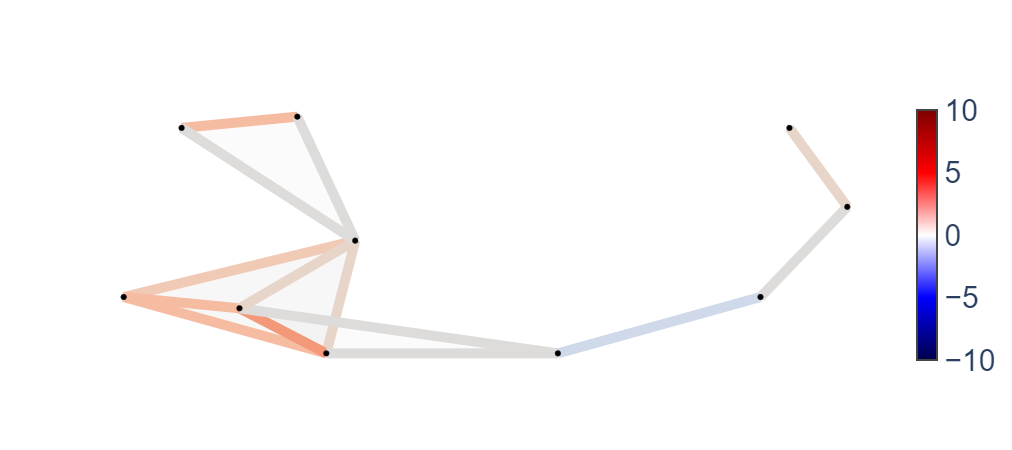

Rips Complex Constructed.


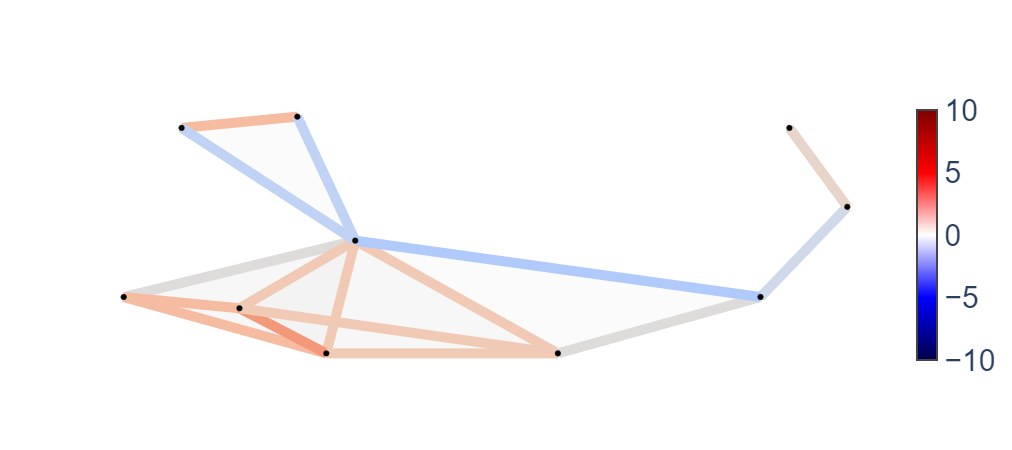

Rips Complex Constructed.


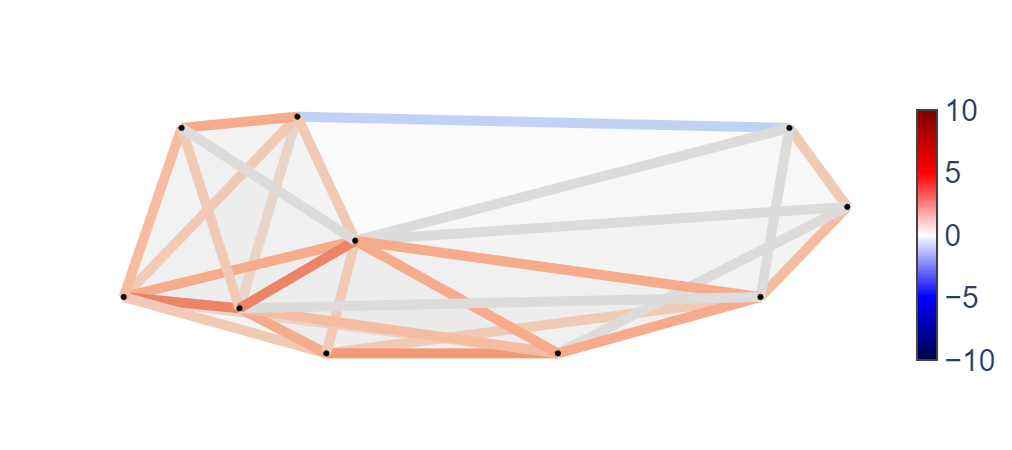

In [6]:
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
edge_c = dict()

for f in [0, 0.5, 1, 1.2, 1.5, 2]:
    sc = GeneralisedFormanRicci(data, epsilon = f)
    G = gen_graph(list(n_faces(sc.S, 1)), sc.pts, sc.labels)
    node_dict = sc.compute_forman()[0]
    edge_dict = sc.compute_forman()[1]

    edge_traces = []
    for edge in G.edges():
        edge_x = []
        edge_y = []
        x0, y0 = G.nodes[edge[0]]['coords']
        x1, y1 = G.nodes[edge[1]]['coords']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

        e = edge_dict[edge]
        #e = ((e-np.mean(list(edge_dict.values())))/(np.std(list(edge_dict.values()))))
        #rint(norm(e))
        color = mpl.cm.coolwarm(norm(e), bytes=True)
        edge_c[edge] = "rgba({},{},{},{})".format(color[0],color[1],color[2], color[3])

        edge_traces.append(go.Scatter(
            x=edge_x, y=edge_y, 
            line=dict(width=10, color=edge_c[edge]),
            hoverinfo='none',
            mode='lines'))

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['coords']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color = 'black',
            size=5, opacity=1, line=dict(color='black', width=1)
            ),
            line_width=2)

    edge_traces.append(node_trace)
    color_range = seismic_cmap
    color_trace = go.Scatter(x=node_x,y=node_y,
                             mode='markers',
                             marker=go.scatter.Marker(colorscale=seismic, cmin=-10, cmax=10,
                                size=.01,
                                color=list(edge_dict.values()),
                                showscale=True, colorbar=dict(thickness=20, outlinewidth=2, tickfont=dict(family='Arial', size=30))
                                )
                            )
    edge_traces.append(color_trace)

    fig = go.Figure(data=edge_traces,
                 layout=go.Layout(
                    showlegend=False, 
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    tri = dict()
    vertices = list(G.nodes())

    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            for k in range(j+1, len(vertices)):
                dist1 = np.linalg.norm(np.array(G.nodes[vertices[i]]['coords']) - G.nodes[vertices[j]]['coords'])
                dist2 = np.linalg.norm(np.array(G.nodes[vertices[j]]['coords']) - G.nodes[vertices[k]]['coords'])
                dist3 = np.linalg.norm(np.array(G.nodes[vertices[k]]['coords']) - G.nodes[vertices[i]]['coords'])
                if dist1 <= f and dist2 <= f and dist3 <= f:
                    #print(v,w,x)
                    tri[(i,j,k)] = dict(type="path", path=" M "+str(G.nodes[vertices[i]]['coords'][0])+" "+str(G.nodes[vertices[i]]['coords'][1])+" L "+str(G.nodes[vertices[j]]['coords'][0])+" "+str(G.nodes[vertices[j]]['coords'][1])+" L "+ str(G.nodes[vertices[k]]['coords'][0])+" "+str(G.nodes[vertices[k]]['coords'][1])+" Z", fillcolor="lightgray", opacity=.1, layer='below')

    shapes = list(tri.values())
    fig.update_layout(shapes = shapes)
    fig.show()

## 2-Simplex Forman Ricci Curvature

Rips Complex Constructed.


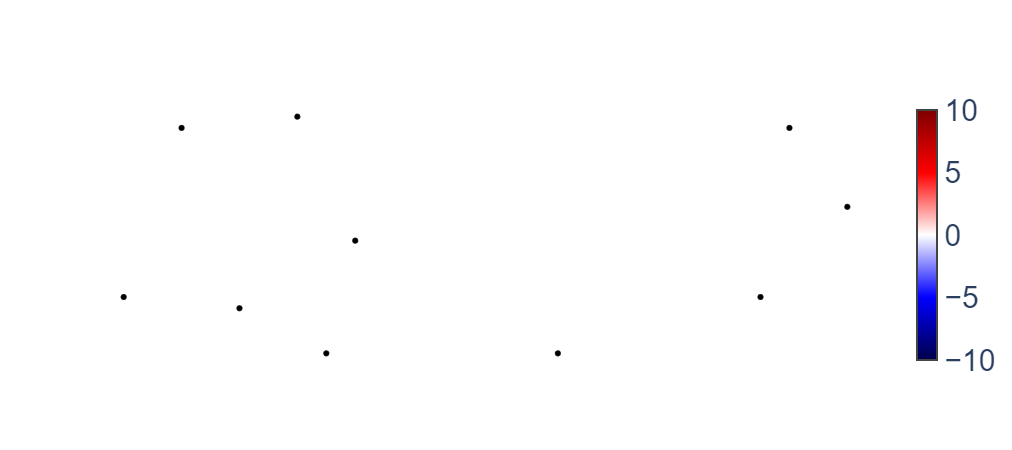

Rips Complex Constructed.


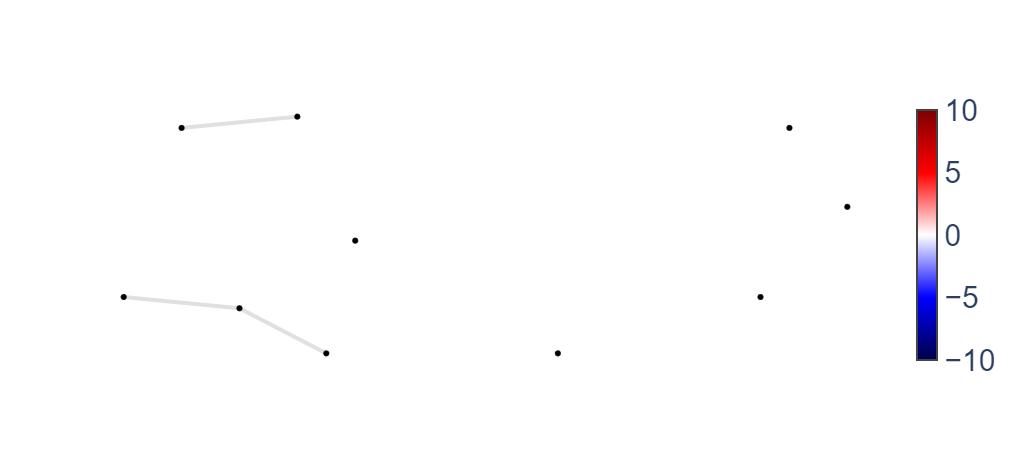

Rips Complex Constructed.


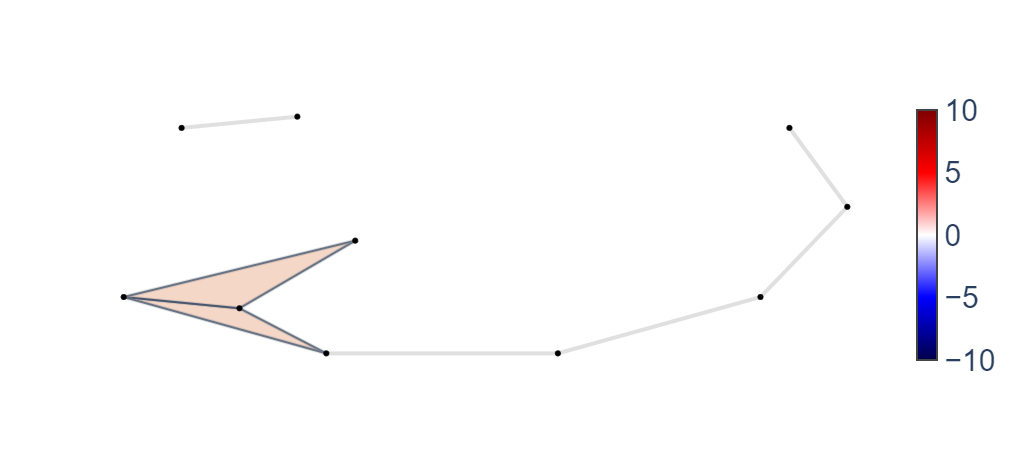

Rips Complex Constructed.


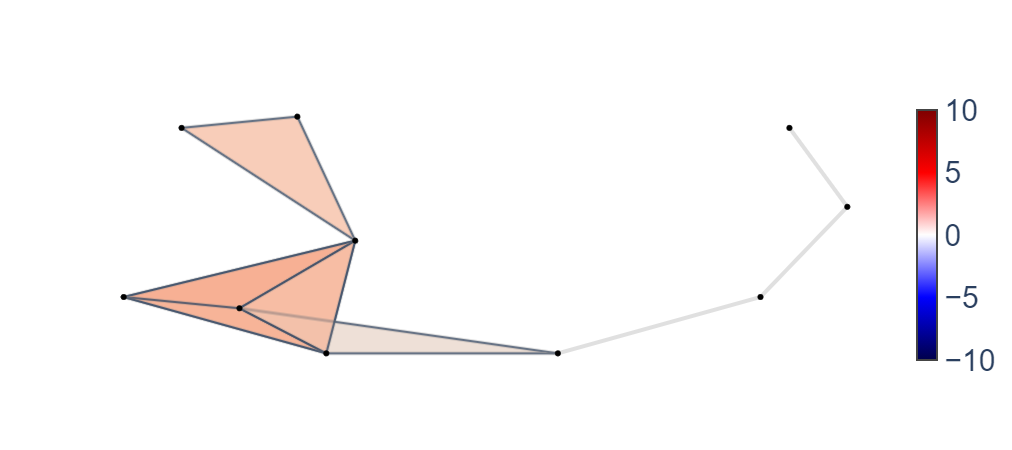

Rips Complex Constructed.


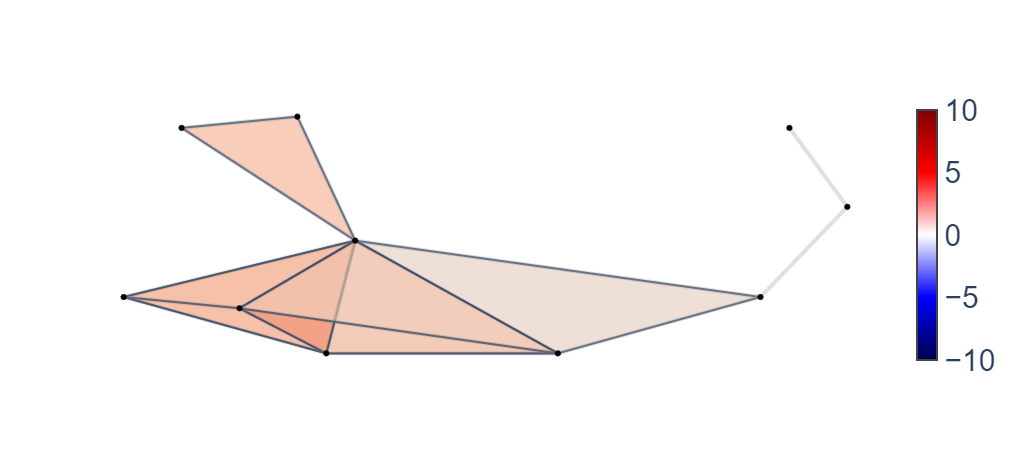

Rips Complex Constructed.


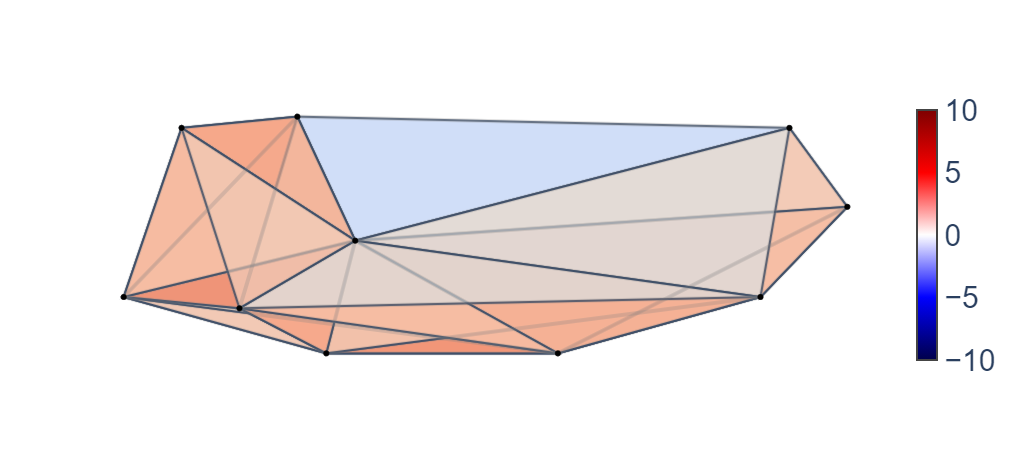

In [8]:
for f in [0, 0.5, 1, 1.2, 1.5, 2]:
    sc = GeneralisedFormanRicci(data, epsilon = f, p = 3)
    G = gen_graph(list(n_faces(sc.S, 1)), sc.pts, sc.labels)
    tri_dict = sc.compute_forman()[2]

    norm = mpl.colors.Normalize(vmin=-10, vmax=10)
    edge_c = dict()

    tri_c = dict()
    edge_traces = []
    for edge in G.edges():
        edge_x = []
        edge_y = []
        x0, y0 = G.nodes[edge[0]]['coords']
        x1, y1 = G.nodes[edge[1]]['coords']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

        edge_traces.append(go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=4, color='gray'), opacity=.25,
            hoverinfo='none',
            mode='lines'))

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['coords']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color = 'black',
            size=5, opacity=1, line=dict(color='black', width=1)
            ),
            line_width=2)

    edge_traces.append(node_trace)
    color_range = seismic_cmap
    color_trace = go.Scatter(x=node_x,y=node_y,
                             mode='markers',
                             marker=go.scatter.Marker(colorscale=seismic, cmin=-10, cmax=10,
                                size=.01,
                                color=list(tri_dict.values()),
                                showscale=True, colorbar=dict(thickness=20, outlinewidth=2, tickfont=dict(family='Arial', size=30))
                                )
                            )
    edge_traces.append(color_trace)

    fig = go.Figure(data=edge_traces,
                 layout=go.Layout(
                    showlegend=False, 
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    tri = dict()
    vertices = list(G.nodes())

    for i in range(len(vertices)):
        for j in range(i+1, len(vertices)):
            for k in range(j+1, len(vertices)):
                dist1 = np.linalg.norm(np.array(G.nodes[vertices[i]]['coords']) - G.nodes[vertices[j]]['coords'])
                dist2 = np.linalg.norm(np.array(G.nodes[vertices[j]]['coords']) - G.nodes[vertices[k]]['coords'])
                dist3 = np.linalg.norm(np.array(G.nodes[vertices[k]]['coords']) - G.nodes[vertices[i]]['coords'])
                if dist1 <= f and dist2 <= f and dist3 <= f:
                    #print(v,w,x)
                    e = tri_dict[(i,j,k)]
                    color = mpl.cm.coolwarm(norm(e), bytes=True)
                    tri_c[(i,j,k)] = "rgba({},{},{},{})".format(color[0],color[1],color[2], color[3])

                    tri[(i,j,k)] = dict(type="path", path=" M "+str(G.nodes[vertices[i]]['coords'][0])+" "+str(G.nodes[vertices[i]]['coords'][1])+" L "+str(G.nodes[vertices[j]]['coords'][0])+" "+str(G.nodes[vertices[j]]['coords'][1])+" L "+ str(G.nodes[vertices[k]]['coords'][0])+" "+str(G.nodes[vertices[k]]['coords'][1])+" Z", fillcolor=tri_c[(i,j,k)], opacity=.75, layer='below')

    shapes = list(tri.values())
    fig.update_layout(shapes = shapes)
    fig.show()